In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix


In [33]:
credito = pd.read_csv('../../Arquivos/Credit.csv')
credito.shape

(1000, 21)

In [34]:
credito.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [8]:
#formato de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [10]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna
# Precisamos criar um objeto para cada atributo categóricom pois
#na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atríbuido a cada valor poderá ser diferente
# O que deixara o reste inconsistente

labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder1.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:,3] = labelencoder1.fit_transform(previsores[:,3])

labelencoder4 = LabelEncoder()
previsores[:,5] = labelencoder1.fit_transform(previsores[:,5])

labelencoder5 = LabelEncoder()
previsores[:,6] = labelencoder1.fit_transform(previsores[:,6])

labelencoder6 = LabelEncoder()
previsores[:,8] = labelencoder1.fit_transform(previsores[:,8])

labelencoder7 = LabelEncoder()
previsores[:,9] = labelencoder1.fit_transform(previsores[:,9])

labelencoder8 = LabelEncoder()
previsores[:,11] = labelencoder1.fit_transform(previsores[:,11])

labelencoder9 = LabelEncoder()
previsores[:,13] = labelencoder1.fit_transform(previsores[:,13])

labelencoder10 = LabelEncoder()
previsores[:,14] = labelencoder1.fit_transform(previsores[:,14])

labelencoder11 = LabelEncoder()
previsores[:,16] = labelencoder1.fit_transform(previsores[:,16])

labelencoder12 = LabelEncoder()
previsores[:,18] = labelencoder1.fit_transform(previsores[:,18])

labelencoder13 = LabelEncoder()
previsores[:,19] = labelencoder1.fit_transform(previsores[:,19])

In [11]:
# Divisão da base de dados entre treinamento e teste(30% para teste e 70% para treino)
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classe,
                                                        test_size=0.3,
                                                        random_state=0)
x_teste


array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [13]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(x_treino,y_treino)


GaussianNB()

In [14]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(x_teste)
previsoes


array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [16]:
# Geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao


array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [17]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto


0.71

C:\Users\rafa_\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


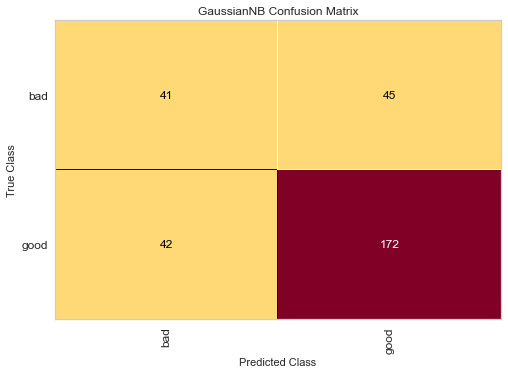

In [18]:
#vizualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(x_treino,y_treino)
v.score(x_teste,y_teste)
v.poof()


In [38]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
jorge = pd.read_csv('../../Arquivos/NovoCredit.csv')
jorge.shape

(1, 20)

In [39]:
#usamos os mesmos objetos de antes
#e só usamos o transform(), já que a adaptação do fit já foi feita

novo_credito = jorge.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

ValueError: y contains previously unseen labels: "'no checking'"

In [30]:
naive_bayes.predict(novo_credito)


ValueError: could not convert string to float: "'no checking'"